In [38]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [39]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [40]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [41]:
## 資料前處理
def preproc_x(x, flatten=True):
  # x = 2 * ((x-min(x)) / (max(x)-min(x))) -1
  x = 2 * ((x-0) / (255-0)) -1
  if flatten:
      x = x.reshape((len(x), -1))
  return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y 

In [42]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [43]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 64, 64]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [44]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 64)                4160      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 64)                4160

In [45]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [46]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [47]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 12s 231us/step - loss: 1.7299 - accuracy: 0.3839 - val_loss: 1.5420 - val_accuracy: 0.4560
Epoch 2/100
50000/50000 [==============================] - 11s 224us/step - loss: 1.4874 - accuracy: 0.4740 - val_loss: 1.4647 - val_accuracy: 0.4856
Epoch 3/100
50000/50000 [==============================] - 11s 223us/step - loss: 1.3703 - accuracy: 0.5144 - val_loss: 1.4122 - val_accuracy: 0.5027
Epoch 4/100
50000/50000 [==============================] - 11s 224us/step - loss: 1.2775 - accuracy: 0.5488 - val_loss: 1.4179 - val_accuracy: 0.5044
Epoch 5/100
50000/50000 [==============================] - 11s 224us/step - loss: 1.1984 - accuracy: 0.5784 - val_loss: 1.3746 - val_accuracy: 0.5175
Epoch 6/100
50000/50000 [==============================] - 11s 224us/step - loss: 1.1295 - accuracy: 0.6032 - val_loss: 1.3555 - val_accuracy: 0.5346
Epoch 7/100
50000/50000 [=========================

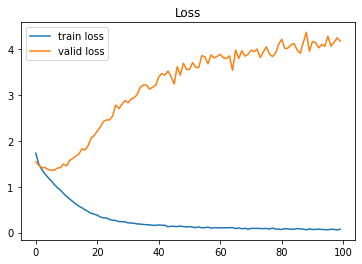

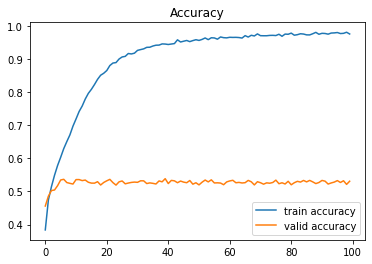

In [48]:
# 訓練模型並檢視驗證集的結果
import matplotlib.pyplot as plt

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()